# Analysis

### Overview
In this exercise we will use the MDTraj library to carry out analyses of the MD simulation trajectories that we’ve produced for ethane and butane.  We’ll also use the NGLview library to visualize the trajectories themselves.

### A quick reminder/introduction
In the previous exercise we generated trajectories (i.e., a time series of atomic coordinates) for two small molecules.  The goal of trajectory analysis is to extract useful (i.e., to a human) information from these time series.  For these molecules we’ll look at bond lengths, angles, and torsion angles.

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [1]:
# Load in the trajectory using MDTraj
import mdtraj as md

temperature = "298.15 K"
pdb_file = "data/ethane.pdb"

traj = md.load(F'ethane_sim_{temperature}.dcd', top=pdb_file)

### Visualization of Trajectory

In [3]:
import nglview as ngl

# Create a view (like creating a plot)

view = ngl.NGLWidget()
view.add_trajectory(traj)
view

NGLWidget(max_frame=99999)

## Analyzing the C-C bond length and H-C-C-H dihedral angle

In [5]:
# Get the atom's index of the molecule
atoms, bonds = traj.topology.to_dataframe()
atoms

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,ETH,0,
1,2,H11,H,1,ETH,0,
2,3,H12,H,1,ETH,0,
3,4,H13,H,1,ETH,0,
4,5,C2,C,1,ETH,0,
5,6,H21,H,1,ETH,0,
6,7,H22,H,1,ETH,0,
7,8,H23,H,1,ETH,0,


In [6]:
bond_indices = [0, 4] # atoms to define the bond length

# Use mdtraj library to calculate bond length.
bond_length = md.compute_distances(traj, [bond_indices])
print(bond_length)

[[0.1529543 ]
 [0.15552972]
 [0.15150344]
 ...
 [0.15370475]
 [0.15199834]
 [0.156409  ]]


<IPython.core.display.Javascript object>


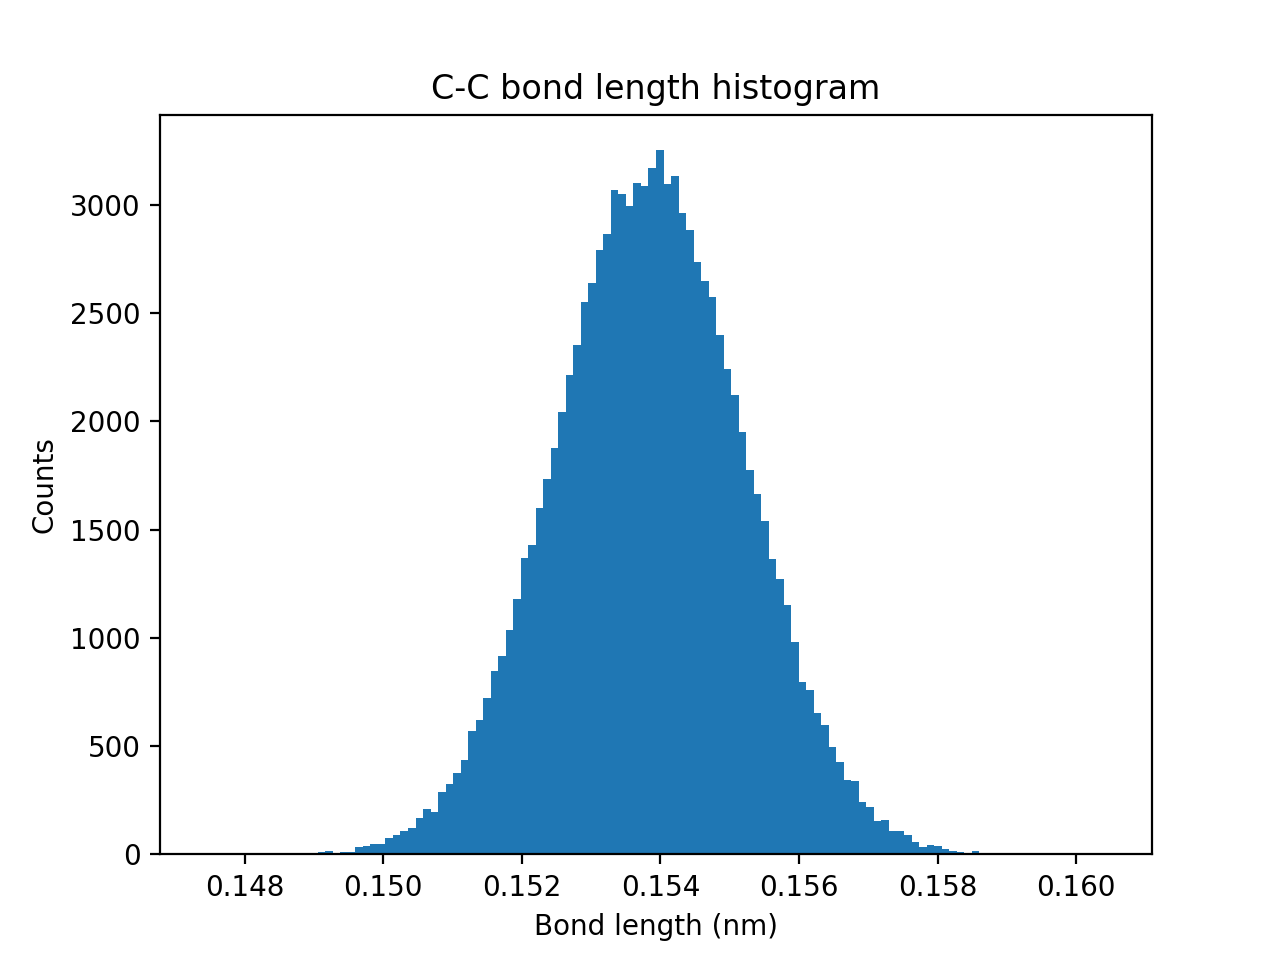

In [7]:
# Create a figure plotting the bond length
bondcounts, binedges, otherstuff = plt.hist(bond_length, bins=120)
plt.title('C-C bond length histogram')
plt.xlabel('Bond length (nm)')
plt.ylabel('Counts')
plt.show()

### Exercise - Analyzing the H-C-C-H torsion angle
A torsion is made up of four atoms which are bonded to each other. 
Analyze the torsion angle associated with the atoms H11-C1-C2-H21 for your trajectory. 

Instead of using the function compute_distance, use **compute_dihedrals**. Create a histogram plot of the torsion angles.

In [8]:
### YOUR CODE HERE ###
phi_indices =  # atoms to define the torsion angle
phi = md.compute_dihedrals(traj, [phi_indices])

print(phi)

[[-3.0268228]
 [ 3.1285424]
 [-2.9077423]
 ...
 [ 3.0960937]
 [ 3.0394037]
 [ 3.034072 ]]


<IPython.core.display.Javascript object>


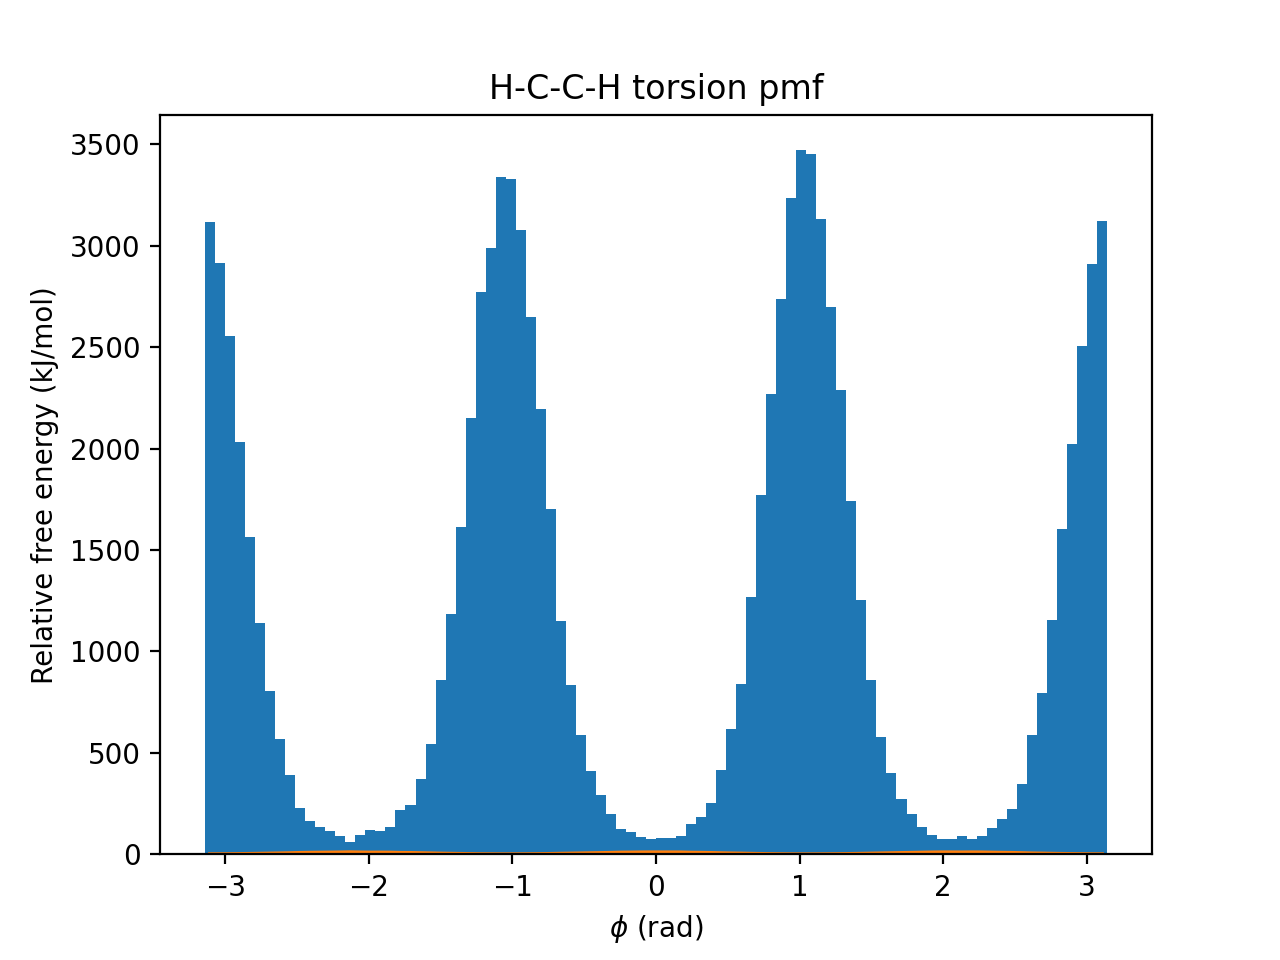

In [18]:
plt.figure()
### YOUR CODE HERE ###


## Potential of Mean Force Calculation

In [ ]:
import numpy as np

### H-C-C-P PMF

<IPython.core.display.Javascript object>


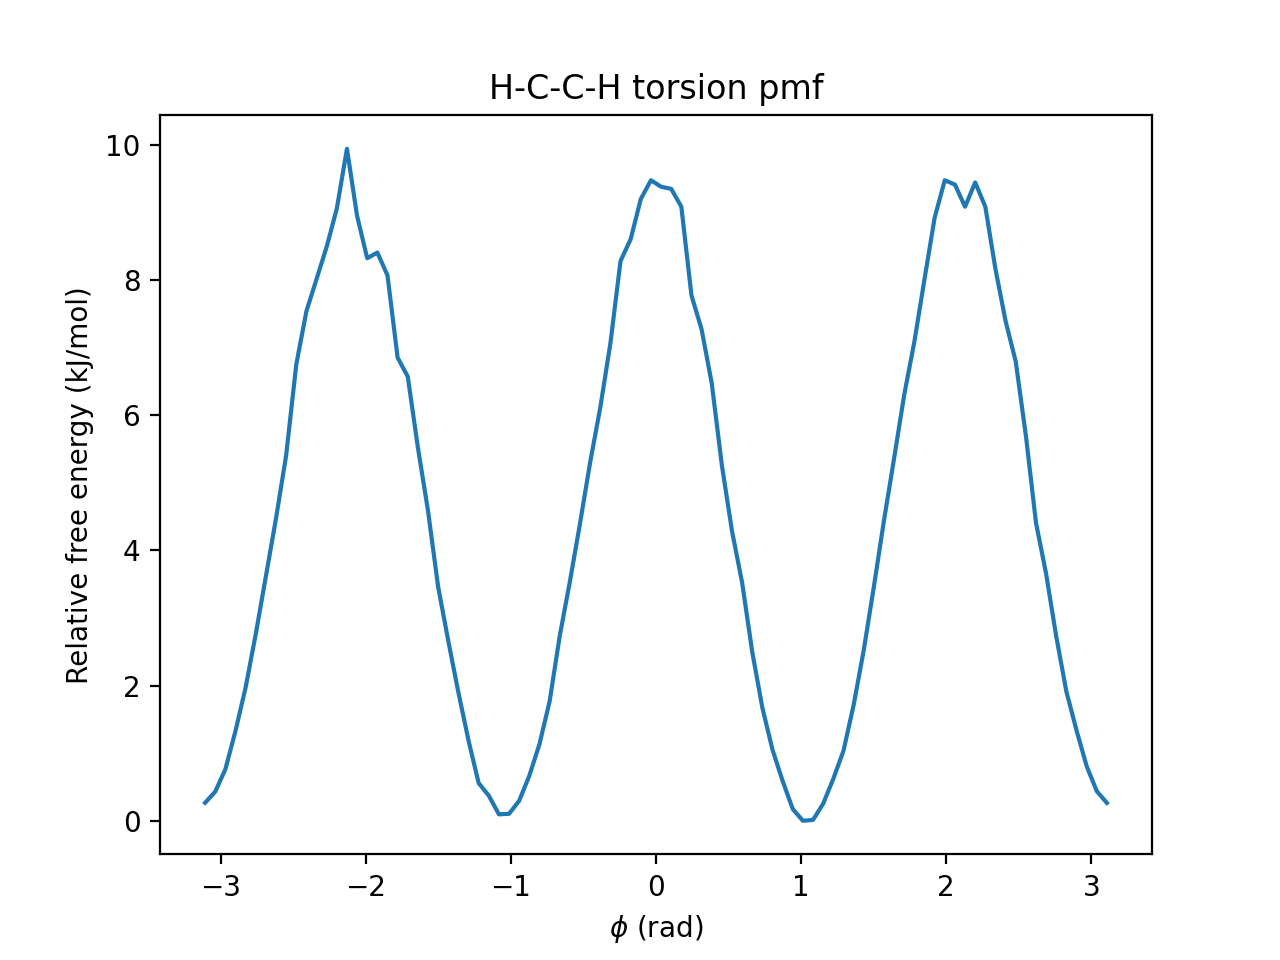

In [20]:
kB = 8.31446/1000 # Boltzmann constant in kJ/mol
Temp = 298.15 # simulation temperature in Kelvin
phicounts[phicounts==0] = 0.1 # get rid of any bins with 0 counts/infinite energy
pmf = -kB*Temp*np.log(phicounts) # W(x) = -kT*ln[p(x)] = -kT*ln[n(x)] + C
pmf = pmf - np.min(pmf) # subtract off minimum value so that energies start from 0

phi_bincenters = (phi_binedges[1:] + phi_binedges[:-1])/2 # compute centers of histogram bins

plt.figure()
plt.plot(phi_bincenters, pmf)
plt.title('H-C-C-H torsion pmf')
plt.xlabel(r'$\phi$ (rad)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.show()

When we examine the plot, we can see that the PMF is not smooth near the free energy maxima.

To make this smoother, we could:
    1. run a longer simulation
    or 
    2. use a smoothing function on our data (from statsmodels.api, as shown below)

### C-C PMF

<IPython.core.display.Javascript object>


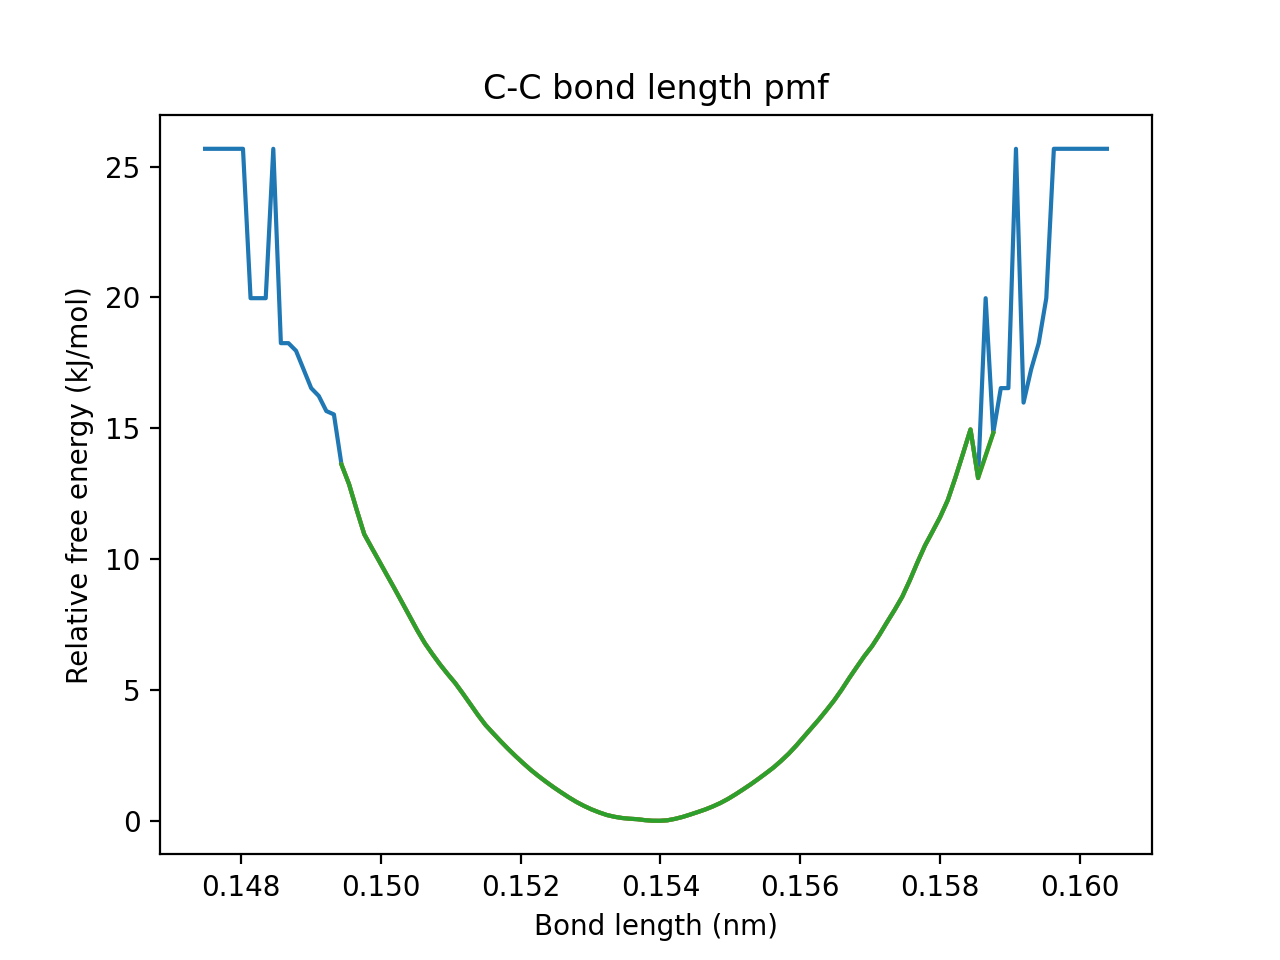

In [14]:
import statsmodels.api as sm

bondcounts[bondcounts==0] = 0.1
pmf = -kB*Temp*np.log(bondcounts)
pmf = pmf - np.min(pmf)

bincenters = (binedges[1:] + binedges[:-1])/2

pmf_smoothed = sm.nonparametric.lowess(pmf, bincenters, frac=0.05)
pmf_s = pmf_smoothed[:,1] - np.min(pmf_smoothed[:,1])

plt.figure()
plt.plot(bincenters, pmf_s)
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-C bond length pmf')
plt.show()

Exclude the higher energy bond lengths by subset the part of our data

In [17]:
plt.plot(bincenters[pmf_s < 15], pmf_s[pmf_s < 15])
plt.xlabel('Bond length (nm)')
plt.ylabel('Relative free energy (kJ/mol)')
plt.title('C-C bond length pmf')
plt.show()

### Summary of this worked example

This workflow contains all of the necessary commands to use MDTraj to carry out an analysis of your ethane simulation.
As written, it requires the files:
* ethane.pdb (topology)
* ethane_sim.dcd (trajectory)
to be imported to the notebook

Briefly, this notebook carried out analyses of: 
1. The C-C bond length analysis
2. The H-C-C-H torsion angle, specifically defined by the atoms H11-C1-C2-H21.  (This specific choice of atoms doesn’t really matter, as the resulting data would be identical for any atoms H1X-C1-C2-H2Y, where X,Y={1,2,3}.  Why?)

In both cases we will first construct a histogram of the observable and then convert the histogram counts into a potential of mean force (pmf) that will recast the count data/probabilities as relative free energies.

## YOUR TURN! - Analysis of Butane Trajectory
Create a copy of this notebook of ethane trajectory analysis and modify your code to analyze your butane trajectory.

1. Read in the files butane.pdb and butane_sim.dcd and visualize using NGLview.
2. Analyze the C-C-C-C torsion angle and compute the PMF.
3. Analyze the C-C-C bond angle (use either C1-C2-C3 or C2-C3-C4) and compute the PMF.
4. Make only a histogram of one of the C-H bond lengths. Pick any C-H pair. What do you notice about the distribution of this bond length?

## Optional Exercises
1. Increase the value for integrator.setConstraintTolerance by a couple of orders of magnitude and re-run your butane simulation.  Then see how the C-H bond length distribution changes!
2. Try changing the temperature and seeing how that affects simulation results.